In [4]:
import tensorflow as tf
from donkey import Donkey
from model import Model
from meta import Meta
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
path_to_eval_tfrecords_file = '../dataset/svhn/test.tfrecords'
batch_size = 16

In [6]:
meta = Meta()
meta.load('../dataset/svhn/meta.json')

In [7]:
image_batch, length_batch, digits_batch = Donkey.build_batch(path_to_eval_tfrecords_file, batch_size=batch_size, num_examples=meta.num_test_examples, shuffled=False)
length_logits, digits_logits = Model.inference(image_batch, drop_rate=0.0)
length_predictions = tf.argmax(length_logits, axis=1)
digits_predictions = tf.argmax(digits_logits, axis=2)
digits_batch_string = tf.reduce_join(tf.as_string(digits_batch), axis=1)
digits_predictions_string = tf.reduce_join(tf.as_string(digits_predictions), axis=1)

In [8]:
sess = tf.InteractiveSession()
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord)

In [9]:
restorer = tf.train.Saver()
checkpoint_path = tf.train.latest_checkpoint('logs/train')
restorer.restore(sess, checkpoint_path)

INFO:tensorflow:Restoring parameters from logs/train\latest.ckpt


In [10]:
length_predictions_val, digits_predictions_string_val, image_batch_val = sess.run([length_predictions, digits_predictions_string, image_batch])
image_batch_val = (image_batch_val / 2.0) + 0.5

In [11]:
idx = 7
image_val = image_batch_val[idx]
length_prediction_val = length_predictions_val[idx]
digits_prediction_string_val = digits_predictions_string_val[idx]

length: 2
digits: b'44101010'


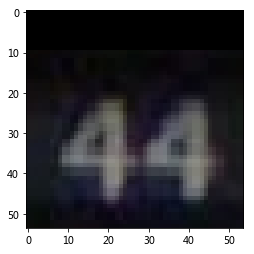

In [13]:
imshow(image_val)
print ('length: %d' % length_prediction_val)
print ('digits: %s' % digits_prediction_string_val)

In [14]:
coord.request_stop()
coord.join(threads)
sess.close()